<a href="https://colab.research.google.com/github/arkeodev/time-series/blob/main/Time_Series_Analysis_with_Deep_Learning/Deep_Learning_TSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$
\begin{array}{c}
\text{$\Large That\ which\ is\ not\ good\ for\ the\ beehive,\ cannot\ be\ good\ for\ the\ bee.$} \\
{\text{$\small Marcus\ Aurelius$}} \\
\end{array}
$$

# Time Series Analysis Using Deep Learning - LSTM and CNN

## Introduction

### Understanding Different Types of Neural Networks

Neural networks are at the heart of many modern machine learning applications. These networks are generally categorized based on their architecture and the specific problems they are designed to solve. The most common types include:

1. **Feedforward Neural Networks:** These are the simplest type of artificial neural network. In this architecture, the information moves in only one direction—forward—from the input nodes, through the hidden nodes (if any), and to the output nodes. There are no cycles or loops in the network, which makes this type ideal for straightforward prediction and classification tasks where the sequence of data is not important.

2. **Convolutional Neural Networks (CNNs):** Highly effective in areas such as image recognition and classification, CNNs automatically detect important features without any human supervision. Their architecture leverages the hierarchical pattern in data and assembles more complex patterns using smaller and simpler patterns.

3. **Recurrent Neural Networks (RNNs):** In contrast to feedforward neural networks, which process inputs in a straightforward, one-way manner, Recurrent Neural Networks (RNNs) are designed with loops in their architecture, allowing information to persist. This looping mechanism enables RNNs to exhibit dynamic temporal behavior, making them uniquely suited for processing sequences of data over time. By maintaining a form of memory through recurrent connections, RNNs can effectively use historical data to influence current outputs, which is beneficial in applications such as time series analysis, speech recognition, language modeling, and any other context where the order and context of data points are critical.

### Long Short-Term Memory (LSTM) Networks

<figure>
    <img src="https://raw.githubusercontent.com/arkeodev/time-series/main/Time_Series_Analysis_with_Deep_Learning/images/lstm_cell.png" width="500" height="300" alt="LSTM Cell">
    <figcaption>LSTM Cell</figcaption>
</figure>

Among various RNN architectures, Long Short-Term Memory networks stand out for their effectiveness in avoiding the long-term dependency problem. Traditional RNNs struggle to learn connections from inputs that occurred many steps ago in the input sequence, due to issues like vanishing or exploding gradients. LSTM networks solve this problem through their unique structure of gates that regulate the flow of information.

**Understanding the Vanishing Gradient Problem**

In traditional RNNs, during the backpropagation phase used for training, gradients of the loss function are propagated backwards in time to update the weights. As these gradients are propagated, they are multiplied by the derivative of the activation function at each timestep. If the derivatives are small (less than 1), the gradients can shrink exponentially as they are propagated back through the timesteps, becoming infinitesimally small. This phenomenon is known as the vanishing gradient problem. It leads to a scenario where the weights of the RNN are not updated effectively, causing the earlier layers to learn very slowly, if at all. This is particularly problematic when dealing with long input sequences where the network needs to remember information from early inputs to predict later ones.

**LSTM Architecture to the Rescue**

LSTMs tackle the vanishing gradient problem through their unique cell structure, which includes three types of gates: the forget gate, the input gate, and the output gate. Each gate in an LSTM cell regulates the flow of information in a way that maintains the cell state across long sequences, thereby mitigating the risk of vanishing gradients:

- **Forget Gate:** Decides which information is irrelevant and can be thrown away, which helps in optimizing the memory of the network by keeping only useful data.
- **Input Gate:** Allows the addition of incoming new information to the cell state, carefully screened through a sigmoid function that decides which values will be updated.
- **Output Gate:** Determines what the next hidden state should be, which not only impacts the current output but also influences the next time step.

## Mathematical Foundations

<figure>
    <img src="https://raw.githubusercontent.com/arkeodev/time-series/main/Time_Series_Analysis_with_Deep_Learning/images/mathematical_formulas_of_lstm.png" width="700" height="300" alt="LSTM Formulas">
    <figcaption>LSTM Formulas</figcaption>
</figure>

Each gate in the LSTM has a specific role: deciding what to forget (forget gate), what new information to store (input gate), and what to output (output gate). The cell state acts as a long-term memory, while the hidden state conveys short-term information. This intricate gating mechanism allows LSTMs to capture temporal dependencies and handle the vanishing gradient problem effectively.

1. **Forget Gate ( $f_t$ ):**
   - **Mathematical Expression:** $f_t = \sigma_g(W_f x_t + U_f h_{t-1} + b_f)$
   - **Contextual Meaning:** This gate decides what information is discarded from the cell state. It uses the sigmoid function $\sigma_g$, which outputs values between 0 and 1. The output of the forget gate $f_t$ is obtained by applying the sigmoid function to a combination of the current input $x_t$, the previous hidden state $h_{t-1}$, and a bias term $b_f$. If $f_t$ is close to 0, it indicates that the cell state should forget the corresponding information; if it is close to 1, it should retain the information.

2. **Input Gate ( $i_t$ ):**
   - **Mathematical Expression:** $i_t = \sigma_g(W_i x_t + U_i h_{t-1} + b_i)$
   - **Contextual Meaning:** This gate controls the flow of new information into the cell state. Similar to the forget gate, it takes the current input $x_t$, the previous hidden state $h_{t-1}$, applies the weights $W_i, U_i$, adds a bias $b_i$, and then applies the sigmoid function. The output $i_t$ indicates which values will be updated in the cell state.

3. **Output Gate ( $o_t$ ):**
   - **Mathematical Expression:** $o_t = \sigma_g(W_o x_t + U_o h_{t-1} + b_o)$
   - **Contextual Meaning:** The output gate determines which parts of the cell state make it to the output. It again uses the current input, the previous hidden state, their respective weights, and a bias term, all passed through a sigmoid function. The values close to 1 in the output $o_t$ indicate that this information should be included in the output hidden state $h_t$.

4. **Cell State Update ( $c_t$ ):**
   - **Mathematical Expression:** $c_t = f_t \odot c_{t-1} + i_t \odot \sigma_c(W_c x_t + U_c h_{t-1} + b_c)$
   - **Contextual Meaning:** The cell state $c_t$ is updated by combining the old state $c_{t-1}$ with the new candidate values, which are scaled by how much we decided to update each state value. The $\odot$ denotes element-wise multiplication. The function $\sigma_c$ is typically the hyperbolic tangent function, which outputs values between -1 and 1. This allows the network to increase or decrease the state value or keep it constant.

5. **Hidden State Output ( $h_t$ ):**
   - **Mathematical Expression:** $h_t = o_t \odot \sigma_h(c_t)$
   - **Contextual Meaning:** The hidden state for the current timestep $h_t$ is calculated by filtering the cell state $c_t$ through the output gate $o_t$. The function $\sigma_h$ here is again usually a hyperbolic tangent function, allowing the hidden state to carry values between -1 and 1. The output hidden state is influenced by the cell's memory and the current input, balancing the information from the past and present.

## Implementing Time Series Forecasting in PyTorch

### Prepare the Environment

In [ ]:
# Necessary imports
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Preprocessing

#### Loading the dataset

In [ ]:
# Load dataset
data_url = "https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv"
df = pd.read_csv(data_url)
print(df.columns)
df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.head()

Index(['Month', '#Passengers'], dtype='object')


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#### Visualizing the trend and seasonality

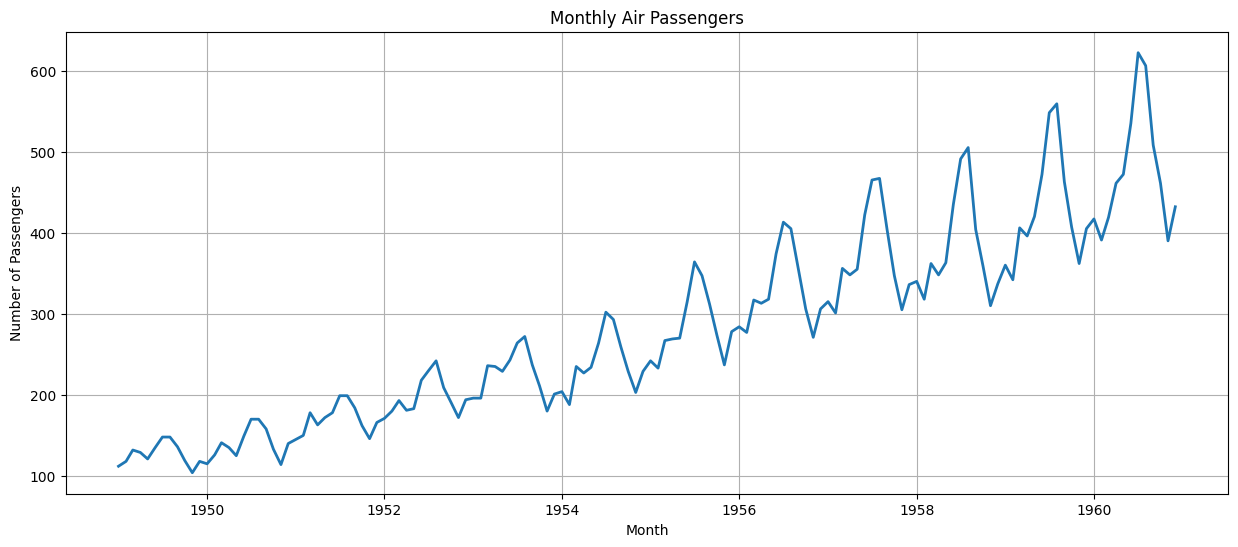

In [ ]:
# Plot the series to see Trend and Seasonality
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Passengers'], label="Passengers", color='tab:blue', linewidth=2)
plt.title('Monthly Air Passengers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

#### Transform data for sequence

In [ ]:
# Convert it into a Sequence to Sequence Prediction Problem
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [ ]:
seq_length = 12  # Using 12 months history
data_normalized = MinMaxScaler().fit_transform(df['Passengers'].values.reshape(-1, 1)).flatten()
inout_seq = create_inout_sequences(data_normalized, seq_length)

In [ ]:
# Preparing Data for Training
X = np.array([x[0] for x in inout_seq])
y = np.array([x[1] for x in inout_seq])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # Reshape to [batch, channels, sequence]
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)  # Reshape to [batch, channels, sequence]
y_test = torch.tensor(y_test, dtype=torch.float32)
print(X_train.shape)

torch.Size([105, 1, 12])


### Model Architecture

Constructing a neural network model using convolutional and LSTM layers. CNN layers can help in identifying hierarchical patterns in the series data, while LSTM layers are effective at capturing long-term dependencies essential for accurate predictions in time series analysis.

In [ ]:
# Define the model
class CNNLSTM(nn.Module):
    def __init__(self):
        super(CNNLSTM, self).__init__()
        self.conv1 = nn.Conv1d(12, 6, kernel_size=5, padding=2) # Convolutional layer
        self.relu = nn.ReLU()
        self.lstm = nn.LSTM(6, 6, batch_first=True)  # LSTM layer
        self.dense = nn.Linear(6, 1)  # Linear layer to output the prediction

    def forward(self, x):
        x = x.permute(0, 2, 1)  # Permute the dimensions to [batch, channels, sequence]
        x = self.relu(self.conv1(x))
        x = x.permute(0, 2, 1)  # Permute back for LSTM
        x, _ = self.lstm(x)
        x = self.dense(x[:, -1, :])
        return x

### Training the Model

In [ ]:
# Initialize model, loss function and optimizer
model = CNNLSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training the model
def train_model(model, criterion, optimizer, X_train, y_train, X_test, y_test, num_epochs=50):
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            model.eval()
            test_preds = model(X_test)
            test_loss = criterion(test_preds, y_test)
            print(f'Epoch {epoch}/{num_epochs} Train loss: {loss.item():.4f} Test loss: {test_loss.item():.4f}')

# Training
train_model(model, criterion, optimizer, X_train, y_train, X_test, y_test, num_epochs=1000)

Epoch 0/1000 Train loss: 0.4551 Test loss: 0.4021
Epoch 10/1000 Train loss: 0.4178 Test loss: 0.3680
Epoch 20/1000 Train loss: 0.3818 Test loss: 0.3352
Epoch 30/1000 Train loss: 0.3463 Test loss: 0.3026
Epoch 40/1000 Train loss: 0.3100 Test loss: 0.2697
Epoch 50/1000 Train loss: 0.2723 Test loss: 0.2357
Epoch 60/1000 Train loss: 0.2334 Test loss: 0.2010
Epoch 70/1000 Train loss: 0.1942 Test loss: 0.1663
Epoch 80/1000 Train loss: 0.1561 Test loss: 0.1329
Epoch 90/1000 Train loss: 0.1205 Test loss: 0.1019
Epoch 100/1000 Train loss: 0.0890 Test loss: 0.0746
Epoch 110/1000 Train loss: 0.0627 Test loss: 0.0521
Epoch 120/1000 Train loss: 0.0423 Test loss: 0.0349
Epoch 130/1000 Train loss: 0.0281 Test loss: 0.0230
Epoch 140/1000 Train loss: 0.0193 Test loss: 0.0157
Epoch 150/1000 Train loss: 0.0146 Test loss: 0.0119
Epoch 160/1000 Train loss: 0.0126 Test loss: 0.0103
Epoch 170/1000 Train loss: 0.0118 Test loss: 0.0096
Epoch 180/1000 Train loss: 0.0116 Test loss: 0.0094
Epoch 190/1000 Train lo

### Model Prediction

#### Prediction

In [ ]:
# Prediction
model.eval()
train_preds = model(X_train)
test_preds = model(X_test)

#### Visualization

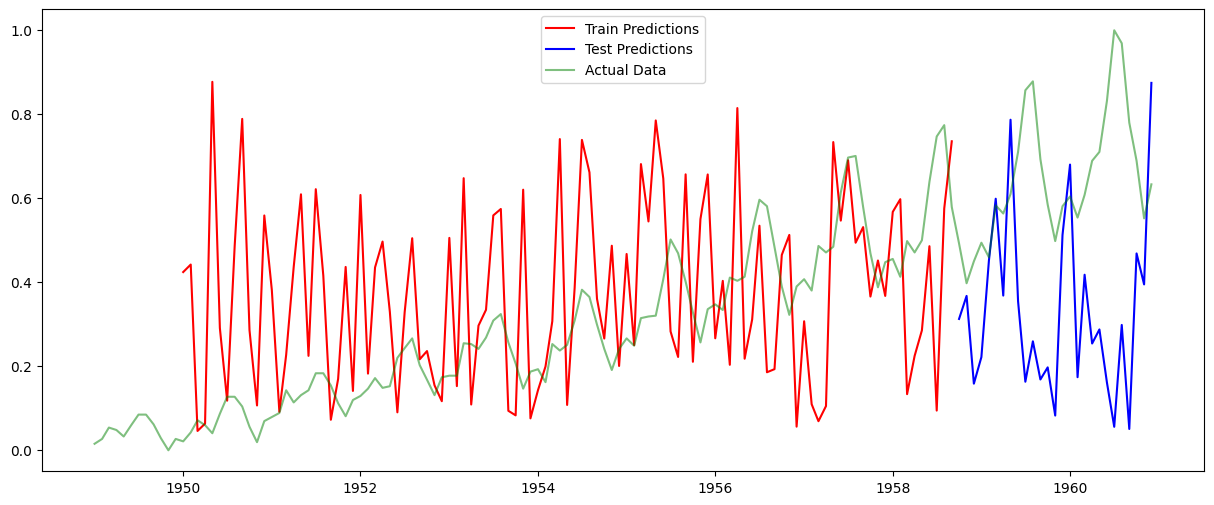

In [ ]:
# Plotting
plt.figure(figsize=(15, 6))
plt.plot(df.index[seq_length:len(train_preds)+seq_length], train_preds.detach().numpy(), 'r', label='Train Predictions')
plt.plot(df.index[len(train_preds)+seq_length:], test_preds.detach().numpy(), 'b', label='Test Predictions')
plt.plot(df.index, data_normalized, 'g', label='Actual Data', alpha=0.5)
plt.legend()
plt.show()

## Conclusion

The integration of LSTM and CNN models offers substantial advantages for time series analysis. LSTMs excel in capturing long-term dependencies thanks to their unique gating mechanisms, which mitigate the vanishing gradient problem and selectively remember important information. CNNs complement this by efficiently extracting spatial hierarchies and patterns from data, making them especially useful in handling large datasets with complex, layered features.

The combination of these models into hybrid architectures leverages the strengths of both, resulting in enhanced feature learning and predictive performance. This approach not only improves model robustness but also reduces the need for manual feature engineering.

## References and Further Reading

- **Colah's Blog on LSTM Networks:** Chris Olah’s blog provides an intuitive and in-depth explanation of LSTMs, making complex concepts accessible without requiring extensive mathematical background. ([Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/))
- **Coursera - Sequence Models Course by DeepLearning.AI:** This course, taught by Andrew Ng, offers practical insights into the use of LSTMs, CNNs, and more for sequence modeling, suitable for applications in natural language processing and other areas.
- **Deep-Learning for Time Series Forecasting: LSTM and CNN Neural Network:** https://medium.com/@sandha.iitr/deep-learning-for-time-series-forecasting-lstm-and-cnn-neur-4c934cb16707